In [1]:
import numpy as np
import pandas as pd
import json
from scipy import stats
from datetime import datetime
from ast import literal_eval

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
# % matplotlib inline

In [2]:
df = pd.read_csv('google_analytics.csv')
df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


channelGrouping      date  \
0  Organic Search  20160902   
1  Organic Search  20160902   
2  Organic Search  20160902   
3  Organic Search  20160902   
4  Organic Search  20160902   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  1131660440785968503   
1  {"browser": "Firefox", "browserVersion": "not ...   377306020877927890   
2  {"browser": "Chrome", "browserVersion": "not a...  3895546263509774583   
3  {"browser": "UC Browser", "browserVersion": "n...  4763447161404445595   
4  {"browser": "Chrome", "browserVersion": "not a...    27294437909732085   

                                          geoNetwork  \
0  {"continent": "Asia", "subContinent": "Western...   
1  {"continent": "Oceania", "subContinent": "Aust...   
2  {"continent": "Europe", "subContinent": "South...   
3  {"continent": "Asia", "subContinent": "Southea...   
4  {"continent": "Europe", "subContinent": "North...   

                        sessionId  socialEngagementType  \
0  1131660440785968503_1472830385  Not Socially Engaged   
1   377306020877927890_1472880147  Not Socially Engaged   
2  3895546263509774583_1472865386  Not Socially Engaged   
3  4763447161404445595_1472881213  Not Socially Engaged   
4    27294437909732085_1472822600  Not Socially Engaged   

                                              totals  \
0  {"visits": "1", "hits": "1", "pageviews": "1",...   
1  {"visits": "1", "hits": "1", "pageviews": "1",...   
2  {"visits": "1", "hits": "1", "pageviews": "1",...   
3  {"visits": "1", "hits": "1", "pageviews": "1",...   
4  {"visits": "1", "hits": "1", "pageviews": "1",...   

                                       trafficSource     visitId  visitNumber  \
0  {"campaign": "(not set)", "source": "google", ...  1472830385            1   
1  {"campaign": "(not set)", "source": "google", ...  1472880147            1   
2  {"campaign": "(not set)", "source": "google", ...  1472865386            1   
3  {"campaign": "(not set)", "source": "google", ...  1472881213            1   
4  {"campaign": "(not set)", "source": "google", ...  1472822600            2   

   visitStartTime  
0      1472830385  
1      1472880147  
2      1472865386  
3      1472881213  
4      1472822600

In [3]:
df.shape

(903653, 12)

Преобразуем колонку totals в словарь для того, чтоб вытащить оттуда непустые transaction revenue

In [4]:
df['totals'] = df['totals'].astype(str)
df['totals'] = df['totals'].apply(literal_eval)
df = df[df['totals'].apply(lambda d: 'transactionRevenue' in d)]

In [5]:
df.shape

(11515, 12)

Колонки, содержащие json, преобразуем

In [6]:
df = df.join(df['device'].apply(lambda x: pd.Series(json.loads(x))), rsuffix='_device')
df = df.join(df['geoNetwork'].apply(lambda x: pd.Series(json.loads(x))), rsuffix='_geoNetwork')
df['totals'] = df['totals'].astype(str)
df['totals'] = df['totals'].replace({'\'': '"'}, regex=True)
df = df.join(df['totals'].apply(lambda x: pd.Series(json.loads(x))), rsuffix='_totals')
df = df.join(df['trafficSource'].apply(lambda x: pd.Series(json.loads(x))), rsuffix='_trafficSource')
df.drop(['device', 'trafficSource', 'geoNetwork', 'totals'], inplace=True, axis=1)
df.head(10)

channelGrouping      date        fullVisitorId  \
752          Direct  20160902  6194193421514403509   
753  Organic Search  20160902  5327166854580374902   
799        Referral  20160902  8885051388942907862   
802        Referral  20160902  0185467632009737931   
859        Referral  20160902  3244885836845029978   
866        Referral  20160902  3351538799616866750   
893          Direct  20160902  1776658355119092313   
910        Referral  20160902   770431600902969839   
922  Organic Search  20160902  7147112211830167925   
925        Referral  20160902  6664733704830724714   

                          sessionId  socialEngagementType     visitId  \
752  6194193421514403509_1472843572  Not Socially Engaged  1472843572   
753  5327166854580374902_1472844906  Not Socially Engaged  1472844906   
799  8885051388942907862_1472827393  Not Socially Engaged  1472827393   
802  0185467632009737931_1472846398  Not Socially Engaged  1472846398   
859  3244885836845029978_1472824817  Not Socially Engaged  1472824817   
866  3351538799616866750_1472855945  Not Socially Engaged  1472855945   
893  1776658355119092313_1472861525  Not Socially Engaged  1472861525   
910   770431600902969839_1472836071  Not Socially Engaged  1472836071   
922  7147112211830167925_1472853332  Not Socially Engaged  1472853332   
925  6664733704830724714_1472853995  Not Socially Engaged  1472853995   

     visitNumber  visitStartTime browser                 browserVersion  ...  \
752            1      1472843572  Chrome  not available in demo dataset  ...   
753            3      1472844906  Chrome  not available in demo dataset  ...   
799            7      1472827393  Chrome  not available in demo dataset  ...   
802            6      1472846398  Chrome  not available in demo dataset  ...   
859            4      1472824817  Chrome  not available in demo dataset  ...   
866            2      1472855945  Chrome  not available in demo dataset  ...   
893            1      1472861525  Safari  not available in demo dataset  ...   
910           13      1472836071  Chrome  not available in demo dataset  ...   
922            1      1472853332  Chrome  not available in demo dataset  ...   
925            7      1472853995  Chrome  not available in demo dataset  ...   

    transactionRevenue newVisits   campaign               source    medium  \
752           37860000         1  (not set)             (direct)    (none)   
753          306670000       NaN  (not set)               google   organic   
799           68030000       NaN  (not set)  mall.googleplex.com  referral   
802           26250000       NaN  (not set)  mall.googleplex.com  referral   
859          574150000       NaN  (not set)  mall.googleplex.com  referral   
866            8380000       NaN  (not set)  mall.googleplex.com  referral   
893          395730000         1  (not set)             (direct)    (none)   
910           24080000       NaN  (not set)  mall.googleplex.com  referral   
922           35480000         1  (not set)               google   organic   
925           35080000       NaN  (not set)     sites.google.com  referral   

                                      adwordsClickInfo isTrueDirect  \
752  {'criteriaParameters': 'not available in demo ...         True   
753  {'criteriaParameters': 'not available in demo ...         True   
799  {'criteriaParameters': 'not available in demo ...         True   
802  {'criteriaParameters': 'not available in demo ...         True   
859  {'criteriaParameters': 'not available in demo ...         True   
866  {'criteriaParameters': 'not available in demo ...         True   
893  {'criteriaParameters': 'not available in demo ...         True   
910  {'criteriaParameters': 'not available in demo ...         True   
922  {'criteriaParameters': 'not available in demo ...          NaN   
925  {'criteriaParameters': 'not available in demo ...         True   

            keyword                                       referralPath  \
752      

Определим количество пропусков

In [7]:
df.replace(to_replace=[np.NaN,
                       '(not provided)',
                       'not available in demo dataset',
                       '(none)',
                       '(not set)'], value=np.NaN, inplace=True)
100 * df.isnull().sum() / df.shape[0]

channelGrouping                0.000000
date                           0.000000
fullVisitorId                  0.000000
sessionId                      0.000000
socialEngagementType           0.000000
visitId                        0.000000
visitNumber                    0.000000
visitStartTime                 0.000000
browser                        0.000000
browserVersion               100.000000
browserSize                  100.000000
operatingSystem                0.000000
operatingSystemVersion       100.000000
isMobile                       0.000000
mobileDeviceBranding         100.000000
mobileDeviceModel            100.000000
mobileInputSelector          100.000000
mobileDeviceInfo             100.000000
mobileDeviceMarketingName    100.000000
flashVersion                 100.000000
language                     100.000000
screenColors                 100.000000
screenResolution             100.000000
deviceCategory                 0.000000
continent                      0.052106


In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['visitHour'] = (df['visitStartTime'].apply(
    lambda x: datetime.fromtimestamp(x).hour))
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')
df.drop(['visitId',
         'browserVersion',
         'browserSize',
         'operatingSystemVersion',
         'mobileDeviceBranding',
         'mobileDeviceModel',
         'mobileInputSelector',
         'mobileDeviceInfo',
         'mobileDeviceMarketingName',
         'flashVersion',
         'language',
         'screenColors',
         'screenResolution',
         'region',
         'metro',
         'city',
         'cityId',
         'latitude',
         'longitude',
         'networkLocation',
         'adwordsClickInfo'], axis=1, inplace=True)

In [9]:
for column in df.columns:
    print(df[column].value_counts())
    print()

Referral          5311
Organic Search    3438
Direct            2042
Paid Search        468
Display            142
Social             104
Affiliates           9
(Other)              1
Name: channelGrouping, dtype: int64

2016-12-16    87
2016-12-12    83
2017-05-01    78
2016-12-13    77
2016-12-05    76
              ..
2017-07-04     7
2016-10-01     6
2017-01-15     6
2017-01-28     4
2017-07-01     3
Name: date, Length: 365, dtype: int64

7813149961404844386    27
4984366501121503466    15
1957458976293878100    12
6760732402251466726    11
608915197735218105      9
                       ..
2699081941742048853     1
1164110348121511511     1
8986179509991315962     1
3091668257669224026     1
7524696809408974105     1
Name: fullVisitorId, Length: 10366, dtype: int64

2571951630476198714_1472105745    2
4136075982495833616_1495722033    1
8199856575540889245_1476140568    1
651435875392157361_1480682514     1
8635761956186400931_1483906872    1
                                 ..
0

In [10]:
df.drop(['adContent',
         'keyword',
         'referralPath',
         'isTrueDirect',
         'campaign',
         'visits',
         'socialEngagementType',
         'networkDomain'], axis=1, inplace=True)
df.head(10)

channelGrouping       date        fullVisitorId  \
752          Direct 2016-09-02  6194193421514403509   
753  Organic Search 2016-09-02  5327166854580374902   
799        Referral 2016-09-02  8885051388942907862   
802        Referral 2016-09-02  0185467632009737931   
859        Referral 2016-09-02  3244885836845029978   
866        Referral 2016-09-02  3351538799616866750   
893          Direct 2016-09-02  1776658355119092313   
910        Referral 2016-09-02   770431600902969839   
922  Organic Search 2016-09-02  7147112211830167925   
925        Referral 2016-09-02  6664733704830724714   

                          sessionId  visitNumber      visitStartTime browser  \
752  6194193421514403509_1472843572            1 2016-09-02 19:12:52  Chrome   
753  5327166854580374902_1472844906            3 2016-09-02 19:35:06  Chrome   
799  8885051388942907862_1472827393            7 2016-09-02 14:43:13  Chrome   
802  0185467632009737931_1472846398            6 2016-09-02 19:59:58  Chrome   
859  3244885836845029978_1472824817            4 2016-09-02 14:00:17  Chrome   
866  3351538799616866750_1472855945            2 2016-09-02 22:39:05  Chrome   
893  1776658355119092313_1472861525            1 2016-09-03 00:12:05  Safari   
910   770431600902969839_1472836071           13 2016-09-02 17:07:51  Chrome   
922  7147112211830167925_1472853332            1 2016-09-02 21:55:32  Chrome   
925  6664733704830724714_1472853995            7 2016-09-02 22:06:35  Chrome   

    operatingSystem  isMobile deviceCategory continent      subContinent  \
752           Linux     False        desktop  Americas  Northern America   
753       Macintosh     False        desktop  Americas  Northern America   
799           Linux     False        desktop  Americas  Northern America   
802         Windows     False        desktop  Americas  Northern America   
859       Macintosh     False        desktop  Americas  Northern America   
866           Linux     False        desktop  Americas  Northern America   
893       Macintosh     False        desktop  Americas  Northern America   
910           Linux     False        desktop  Americas  Northern America   
922         Android      True         mobile  Americas  Northern America   
925       Chrome OS     False        desktop  Americas  Northern America   

           country hits pageviews transactionRevenue newVisits  \
752  United States   11        11           37860000         1   
753  United States   11        10          306670000       NaN   
799  United States   13        11           68030000       NaN   
802  United States   13        12           26250000       NaN   
859  United States   17        14          574150000       NaN   
866  United States   17        17            8380000       NaN   
893  United States   19        16          395730000         1   
910  United States   20        15           24080000       NaN   
922  United States   22        16           35480000         1   
925  United States   22        20           35080000       NaN   

                  source    medium  visitHour  
752             (direct)       NaN         22  
753               google   organic         22  
799  mall.googleplex.com  referral         17  
802  mall.googleplex.com  referral         22  
859  mall.googleplex.com  referral         17  
866  mall.googleplex.com  referral          1  
893             (direct)       NaN          3  
910  mall.googleplex.com  referral         20  
922               google   organic          0  
925     sites.google.com  referral          1

На этом чистка колонок завершена, идем дальше

In [11]:
df.describe(include='all')

<ipython-input-11-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-11-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


channelGrouping                 date  fullVisitorId  \
count            11515                11515   1.151500e+04   
unique               8                  365   1.036600e+04   
top           Referral  2016-12-16 00:00:00   7.813150e+18   
freq              5311                   87   2.700000e+01   
first              NaN  2016-08-01 00:00:00            NaN   
last               NaN  2017-08-01 00:00:00            NaN   
mean               NaN                  NaN            NaN   
std                NaN                  NaN            NaN   
min                NaN                  NaN            NaN   
25%                NaN                  NaN            NaN   
50%                NaN                  NaN            NaN   
75%                NaN                  NaN            NaN   
max                NaN                  NaN            NaN   

                             sessionId   visitNumber       visitStartTime  \
count                            11515  11515.000000                11515   
unique                           11514           NaN                11512   
top     2571951630476198714_1472105745           NaN  2017-05-16 23:39:44   
freq                                 2           NaN                    2   
first                              NaN           NaN  2016-08-01 10:12:45   
last                               NaN           NaN  2017-08-02 05:31:08   
mean                               NaN      4.083196                  NaN   
std                                NaN     12.508556                  NaN   
min                                NaN      1.000000                  NaN   
25%                                NaN      1.000000                  NaN   
50%                                NaN      2.000000                  NaN   
75%                                NaN      4.000000                  NaN   
max                                NaN    315.000000                  NaN   

       browser operatingSystem isMobile deviceCategory continent  \
count    11515           11515    11515          11515     11509   
unique       9               7        2              3         5   
top     Chrome       Macintosh    False        desktop  Americas   
freq     10353            6426    10495          10495     11283   
first      NaN             NaN      NaN            NaN       NaN   
last       NaN             NaN      NaN            NaN       NaN   
mean       NaN             NaN      NaN            NaN       NaN   
std        NaN             NaN      NaN            NaN       NaN   
min        NaN             NaN      NaN            NaN       NaN   
25%        NaN             NaN      NaN            NaN       NaN   
50%        NaN             NaN      NaN            NaN       NaN   
75%        NaN             NaN      NaN            NaN       NaN   
max        NaN             NaN      NaN            NaN       NaN   

            subContinent        country   hits pageviews transactionRevenue  \
count              11509          11509  11515     11515              11515   
unique                18             68    215       168               5332   
top     Northern America  United States     18        16           16990000   
freq               11143          10953    375       478                256   
first                NaN            NaN    NaN       NaN                NaN   
last                 NaN            NaN    NaN       NaN                NaN   
mean                 NaN            NaN    NaN       NaN                NaN   
std                  NaN            NaN    NaN       NaN                NaN   
min                  NaN            NaN    NaN       NaN                NaN   
25%                  NaN            NaN    NaN       NaN                NaN   
50%                  NaN            NaN    NaN       NaN                NaN   
75%                  NaN            NaN    NaN       NaN                NaN   
max                  NaN            NaN    NaN       NaN                NaN   


In [12]:
df.dtypes

channelGrouping               object
date                  datetime64[ns]
fullVisitorId                 object
sessionId                     object
visitNumber                    int64
visitStartTime        datetime64[ns]
browser                       object
operatingSystem               object
isMobile                        bool
deviceCategory                object
continent                     object
subContinent                  object
country                       object
hits                          object
pageviews                     object
transactionRevenue            object
newVisits                     object
source                        object
medium                        object
visitHour                      int64
dtype: object

Преобразуем несколько колонок в правильный тип

In [13]:
# df['pageviews'] = np.where(df['pageviews'] == np.nan, None, df['pageviews'])
# df['hits'] = np.where(df['hits'] == np.nan, None, df['hits'])
# df['newVisits'] = np.where(df['newVisits'] == np.nan, None, df['newVisits'])
# df['transactionRevenue'] = np.where(df['transactionRevenue'] == np.nan, None, df['transactionRevenue'])

# df['pageviews'].fillna(value=df['pageviews'].mean(), inplace=True)
df['hits'] = df['hits'].astype(str).astype(int)
df['pageviews'] = df['pageviews'].astype(str).astype(float)
df['newVisits'] = df['newVisits'].astype(str).astype(float)
df['transactionRevenue'] = df['transactionRevenue'].astype(str).astype(float)
df.describe(include='all')

<ipython-input-13-1542e921b476>:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-13-1542e921b476>:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


channelGrouping                 date  fullVisitorId  \
count            11515                11515   1.151500e+04   
unique               8                  365   1.036600e+04   
top           Referral  2016-12-16 00:00:00   7.813150e+18   
freq              5311                   87   2.700000e+01   
first              NaN  2016-08-01 00:00:00            NaN   
last               NaN  2017-08-01 00:00:00            NaN   
mean               NaN                  NaN            NaN   
std                NaN                  NaN            NaN   
min                NaN                  NaN            NaN   
25%                NaN                  NaN            NaN   
50%                NaN                  NaN            NaN   
75%                NaN                  NaN            NaN   
max                NaN                  NaN            NaN   

                             sessionId   visitNumber       visitStartTime  \
count                            11515  11515.000000                11515   
unique                           11514           NaN                11512   
top     2571951630476198714_1472105745           NaN  2017-05-16 23:39:44   
freq                                 2           NaN                    2   
first                              NaN           NaN  2016-08-01 10:12:45   
last                               NaN           NaN  2017-08-02 05:31:08   
mean                               NaN      4.083196                  NaN   
std                                NaN     12.508556                  NaN   
min                                NaN      1.000000                  NaN   
25%                                NaN      1.000000                  NaN   
50%                                NaN      2.000000                  NaN   
75%                                NaN      4.000000                  NaN   
max                                NaN    315.000000                  NaN   

       browser operatingSystem isMobile deviceCategory continent  \
count    11515           11515    11515          11515     11509   
unique       9               7        2              3         5   
top     Chrome       Macintosh    False        desktop  Americas   
freq     10353            6426    10495          10495     11283   
first      NaN             NaN      NaN            NaN       NaN   
last       NaN             NaN      NaN            NaN       NaN   
mean       NaN             NaN      NaN            NaN       NaN   
std        NaN             NaN      NaN            NaN       NaN   
min        NaN             NaN      NaN            NaN       NaN   
25%        NaN             NaN      NaN            NaN       NaN   
50%        NaN             NaN      NaN            NaN       NaN   
75%        NaN             NaN      NaN            NaN       NaN   
max        NaN             NaN      NaN            NaN       NaN   

            subContinent        country          hits     pageviews  \
count              11509          11509  11515.000000  11515.000000   
unique                18             68           NaN           NaN   
top     Northern America  United States           NaN           NaN   
freq               11143          10953           NaN           NaN   
first                NaN            NaN           NaN           NaN   
last                 NaN            NaN           NaN           NaN   
mean                 NaN            NaN     36.274251     28.330439   
std                  NaN            NaN     30.269294     21.727555   
min                  NaN            NaN      2.000000      2.000000   
25%                  NaN            NaN     19.000000     16.000000   
50%                  NaN            NaN     28.000000     23.000000   
75%                  NaN            NaN     44.000000     34.000000   
max                  NaN            NaN    500.000000    469.000000   

        transactionRevenue  newVisits               source    medium  \
count         1.151500e+04     4465.0  

Среднее кол-во пользователей в день 31.273972602739725


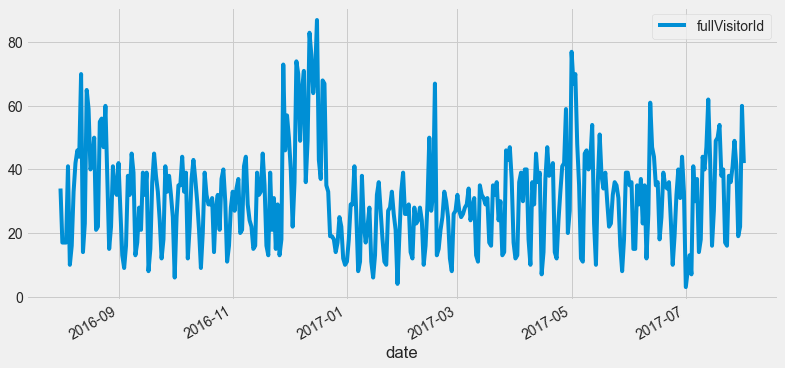

In [14]:
dfDay = (df.groupby('date')
         .agg({'fullVisitorId': 'nunique'})
         .sort_values('date'))
print('Среднее кол-во пользователей в день {}'.format(dfDay['fullVisitorId'].mean()))
dfDay.plot(figsize=(12, 6));

Среднее кол-во пользователей в месяц 843.5384615384615


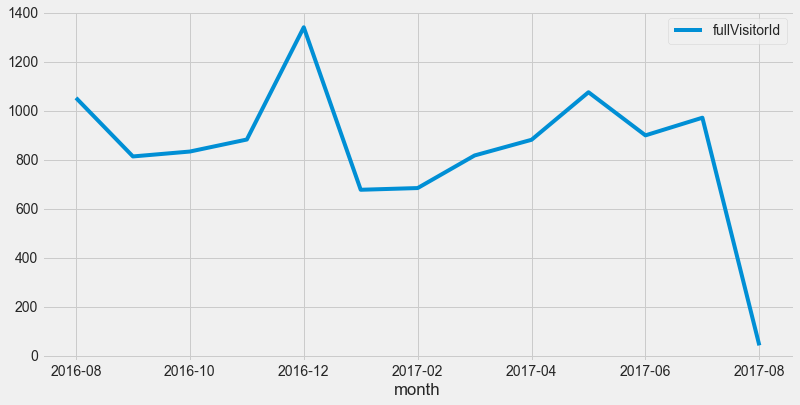

In [15]:
df['month'] = df['date'].apply(lambda w: w.strftime('%Y-%m'))
df["visitWeekday"] = df['date'].dt.weekday
dfMonth = (
    df.groupby('month')
    .agg({'fullVisitorId': 'nunique'})
    .sort_values('month')
)
print('Среднее кол-во пользователей в месяц {}'.format(dfMonth['fullVisitorId'].mean()))
dfMonth.plot(figsize=(12, 6));

Основные посещение магазин переживает осенью, летом идет очень сильный спад. На дневном графике четко прослеживается недельная сезонность: в выходные видим спад активности

Среднее кол-во сессий в день 31.54794520547945


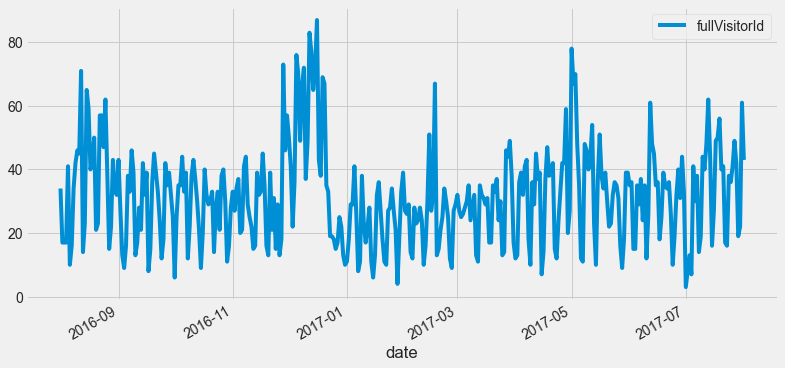

In [16]:
dfSession = (
    df.groupby('date')
    .agg({'fullVisitorId': 'count'})
    .sort_values('date')
)
print('Среднее кол-во сессий в день {}'.format(dfSession['fullVisitorId'].mean()))
dfSession.plot(figsize=(12, 6));

Построенная картинка почти не отличается от динамики уникальных пользователей. Выдвину гипотезу, что юзеры возвращаются достаточно редко. Применим когортный анализ для подтверждения или опровержения гипотезы. За когорту берем пользователей, зарегистрированных в одном месяце

In [17]:
first_month_session = (
    df.groupby('fullVisitorId')
    .agg({
        'month': 'min',
        'date': 'min',
        'visitStartTime': 'min'
    })
)
first_month_session.columns = ['first_month', 'first_day', 'first_ts']
first_month_session.head()

first_month  first_day            first_ts
fullVisitorId                                             
213131142648941     2017-04 2017-04-28 2017-04-28 22:41:58
435324061339869     2016-10 2016-10-20 2016-10-21 01:33:41
562678147042735     2017-04 2017-04-24 2017-04-24 14:27:36
585708896049892     2016-12 2016-12-21 2016-12-21 20:59:44
670722016498267     2017-07 2017-07-10 2017-07-10 18:00:43

In [18]:
df = df.merge(first_month_session, on='fullVisitorId')

cohort_month = df[['fullVisitorId', 'month', 'first_month']]
cohort_month.head()

fullVisitorId    month first_month
0  6194193421514403509  2016-09     2016-09
1  5327166854580374902  2016-09     2016-09
2  8885051388942907862  2016-09     2016-08
3  8885051388942907862  2016-08     2016-08
4  8885051388942907862  2016-08     2016-08

In [19]:
retention = cohort_month.pivot_table(
    index='first_month',
    columns='month',
    values='fullVisitorId',
    aggfunc='nunique'
)
retention

month        2016-08  2016-09  2016-10  2016-11  2016-12  2017-01  2017-02  \
first_month                                                                  
2016-08       1052.0     33.0     17.0     11.0      4.0      3.0      3.0   
2016-09          NaN    780.0     21.0      8.0      6.0      1.0      NaN   
2016-10          NaN      NaN    795.0     32.0     14.0     14.0      9.0   
2016-11          NaN      NaN      NaN    831.0     31.0     24.0     11.0   
2016-12          NaN      NaN      NaN      NaN   1285.0     19.0     13.0   
2017-01          NaN      NaN      NaN      NaN      NaN    616.0     13.0   
2017-02          NaN      NaN      NaN      NaN      NaN      NaN    635.0   
2017-03          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-04          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-05          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-06          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-07          NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2017-08          NaN      NaN      NaN      NaN      NaN      NaN      NaN   

month        2017-03  2017-04  2017-05  2017-06  2017-07  2017-08  
first_month                                                        
2016-08          3.0      NaN      NaN      1.0      NaN      NaN  
2016-09          2.0      2.0      NaN      1.0      NaN      NaN  
2016-10         13.0     10.0      4.0      2.0      2.0      NaN  
2016-11         11.0      8.0      9.0      2.0      3.0      1.0  
2016-12         14.0      2.0      7.0      3.0      2.0      NaN  
2017-01          9.0      NaN      1.0      1.0      NaN      NaN  
2017-02         19.0     14.0      8.0      4.0      5.0      NaN  
2017-03        746.0     29.0      8.0     13.0      4.0      NaN  
2017-04          NaN    816.0     25.0      9.0      3.0      NaN  
2017-05          NaN      NaN   1013.0     23.0      8.0      1.0  
2017-06          NaN      NaN      NaN    840.0     26.0      NaN  
2017-07          NaN      NaN      NaN      NaN    918.0      1.0  
2017-08          NaN      NaN      NaN      NaN      NaN     39.0

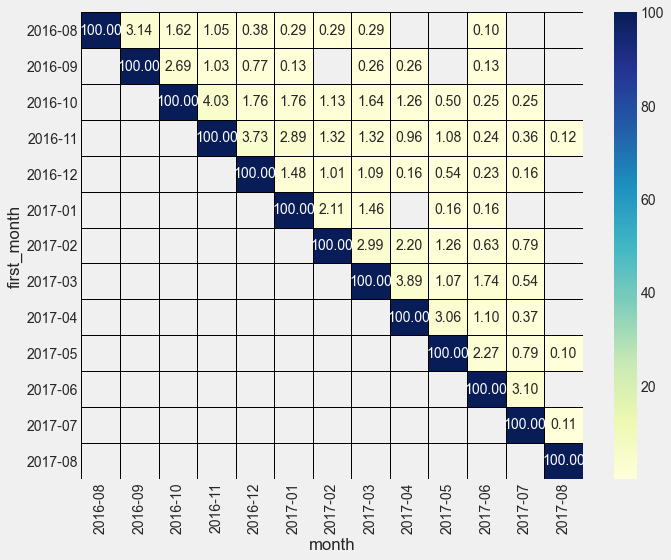

In [20]:
first_date = retention.values.diagonal()

for s, row in zip(first_date, retention):
    retention.loc[row] = 100 * (retention.loc[row] / s)

plt.figure(figsize=(10, 8))
sns.heatmap(
    retention,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap="YlGnBu"
);

Возвраты крайне малы. Около 3% возвращаются на второй месяц, а дальше retention стремится к нулю

In [21]:
# 903000 - столько записей было в оригинальном датасете
# мы взяли из него только строки с существующим transaction revenue, то есть пользователей с покупками
# df[df['transactionRevenue'] == 0] выдает 0 записей
100 * df.shape[0] / 903000

1.2751937984496124

Чуть более процента пришедших юзеров сделали покупку

Посмотрим на распределение выручки

<AxesSubplot:>

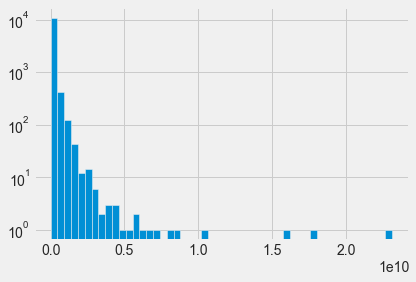

In [22]:
dfBuy = df.copy()
dfBuy['transactionRevenue'].hist(bins=50, log=True)

Посмотрим на динамику покупок.

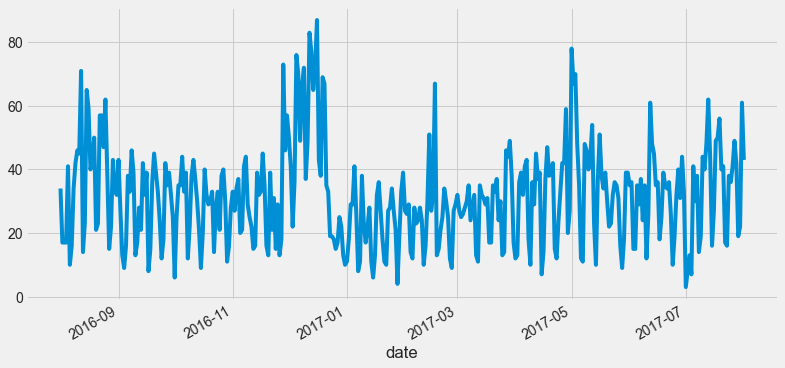

In [23]:
dfBuy.groupby('date')['fullVisitorId'].count().plot(figsize=(12, 6));

Покупки мало чем отличаются от графика визитов в плане графика и динамики. Посмотрим на распределение покупок относительно дней часов

In [24]:
dfBuy.pivot_table(
    index='visitHour',
    columns='visitWeekday',
    values='transactionRevenue',
    aggfunc='sum'
).style.background_gradient()

C 18 до 23 часов видим самое большое число покупок.

Стастика покупок в разбиении когорт

In [25]:
first_day_buy = (
    dfBuy.groupby('fullVisitorId')
    .agg({
        'month':'min',
        'date': 'min',
        'first_ts': 'min'
    })
)
first_day_buy.columns = ['first_buy_month', 'first_buy_day', 'first_buy_ts']
dfBuy = dfBuy.join(first_day_buy, on='fullVisitorId')

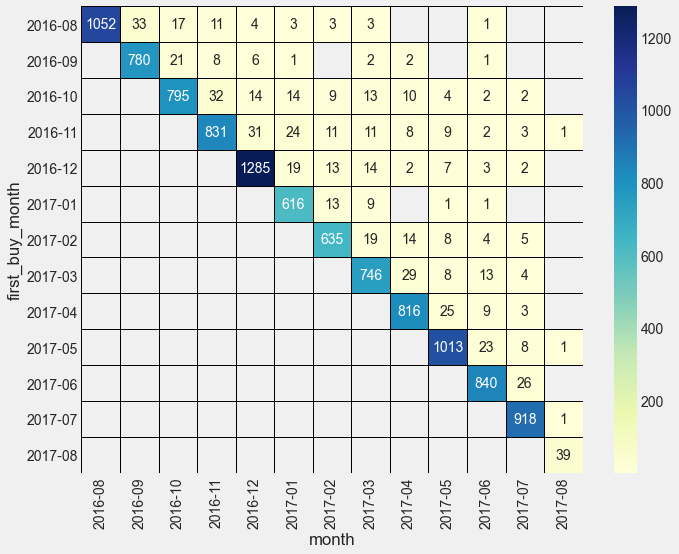

In [26]:
sales = dfBuy.pivot_table(
    index='first_buy_month',
    columns='month',
    values='fullVisitorId',
    aggfunc='nunique'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    sales,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black',
    cmap="YlGnBu"
);

Снова заметно, что интерес к магазину пропадает уже на второй месяц

Посчитаем дневной средний доход

<AxesSubplot:xlabel='date'>

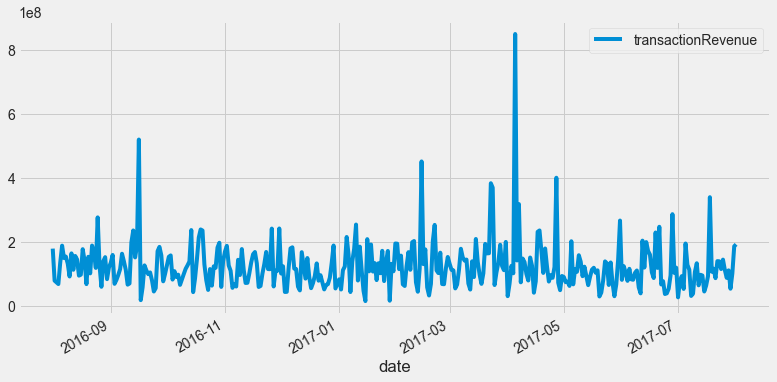

In [27]:
(
    dfBuy.groupby('date')
    .agg({'transactionRevenue': 'mean'})
    .plot(figsize=(12, 6))
)

Посмотрим сколько денег приносят отдельные когорты

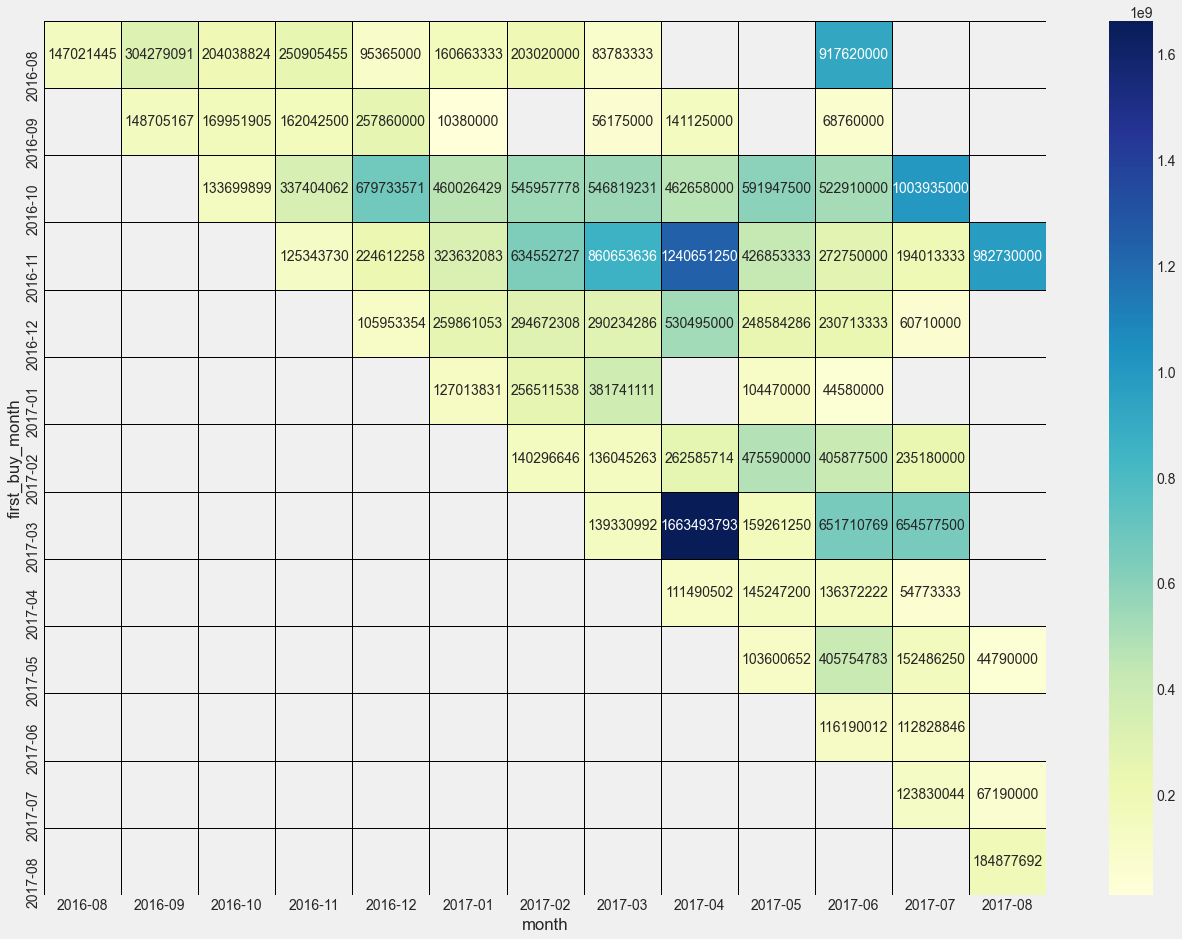

In [28]:
sales_sum = dfBuy.pivot_table(
    index='first_buy_month',
    columns='month',
    values='transactionRevenue',
    aggfunc='sum'
)

plt.figure(figsize=(20, 15))
sns.heatmap(
    sales_sum / sales,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black',
    cmap="YlGnBu"
);

Есть покупки на крупную сумму в конце 2016 года

In [29]:
dfBuy['transactionRevenue'] = dfBuy['transactionRevenue'].apply(lambda w: np.log(w + 1))

Из каких стран чаще всего юзеры совершают покупки

In [30]:
dfBuy['country'].value_counts()

United States    10953
Canada             190
Venezuela           63
Mexico              20
Taiwan              19
                 ...  
Armenia              1
Cyprus               1
Anguilla             1
Uruguay              1
Curaçao              1
Name: country, Length: 68, dtype: int64

In [31]:
trace0 = go.Choropleth(z=dfBuy['transactionRevenue'],
                       locations=dfBuy['country'],
                       locationmode='country names',
                       colorbar_title='transaction revenue by country')
fig = go.Figure(data=trace0)
fig

Средний показатель выручки в разрезе по континентам

In [32]:
trace0 = go.Scatter(x=np.sort(dfBuy['date'].unique()),
                    y=dfBuy.groupby(['month', 'continent'])['transactionRevenue'].mean().unstack()['Americas'],
                    name='Americas')
trace1 = go.Scatter(x=np.sort(dfBuy['date'].unique()),
                    y=dfBuy.groupby(['month', 'continent'])['transactionRevenue'].mean().unstack()['Asia'],
                    name='Asia')
trace2 = go.Scatter(x=np.sort(dfBuy['date'].unique()),
                    y=dfBuy.groupby(['month', 'continent'])['transactionRevenue'].mean().unstack()['Europe'],
                    name='Europe')
fig = go.Figure(data=[trace0, trace1, trace2])
fig

Время, прошедшее от даты первого визита до текущего

In [33]:
# first visit date = first day

In [34]:
diff_per_session = (
    dfBuy.groupby(['fullVisitorId', 'sessionId'])
    .agg({
        'date': 'min',
        'first_day': 'min'
    })
)

In [35]:
diff_per_session['diff_with_first_visit_date'] = (diff_per_session['date'] - diff_per_session[
    'first_day']) / np.timedelta64(1, 'D')

In [36]:
dfBuy = dfBuy.merge(diff_per_session['diff_with_first_visit_date'],
                    how='inner', on=['fullVisitorId', 'sessionId'])

dfBuy.head()

channelGrouping       date        fullVisitorId  \
0          Direct 2016-09-02  6194193421514403509   
1  Organic Search 2016-09-02  5327166854580374902   
2        Referral 2016-09-02  8885051388942907862   
3        Referral 2016-08-25  8885051388942907862   
4        Referral 2016-08-12  8885051388942907862   

                        sessionId  visitNumber      visitStartTime browser  \
0  6194193421514403509_1472843572            1 2016-09-02 19:12:52  Chrome   
1  5327166854580374902_1472844906            3 2016-09-02 19:35:06  Chrome   
2  8885051388942907862_1472827393            7 2016-09-02 14:43:13  Chrome   
3  8885051388942907862_1472166411            6 2016-08-25 23:06:51  Chrome   
4  8885051388942907862_1471042960            4 2016-08-12 23:02:40  Chrome   

  operatingSystem  isMobile deviceCategory  ... visitHour    month  \
0           Linux     False        desktop  ...        22  2016-09   
1       Macintosh     False        desktop  ...        22  2016-09   
2           Linux     False        desktop  ...        17  2016-09   
3           Linux     False        desktop  ...         2  2016-08   
4           Linux     False        desktop  ...         2  2016-08   

  visitWeekday  first_month  first_day            first_ts  first_buy_month  \
0            4      2016-09 2016-09-02 2016-09-02 19:12:52          2016-09   
1            4      2016-09 2016-09-02 2016-09-02 19:35:06          2016-09   
2            4      2016-08 2016-08-12 2016-08-12 23:02:40          2016-08   
3            3      2016-08 2016-08-12 2016-08-12 23:02:40          2016-08   
4            4      2016-08 2016-08-12 2016-08-12 23:02:40          2016-08   

  first_buy_day        first_buy_ts  diff_with_first_visit_date  
0    2016-09-02 2016-09-02 19:12:52                         0.0  
1    2016-09-02 2016-09-02 19:35:06                         0.0  
2    2016-08-12 2016-08-12 23:02:40                        21.0  
3    2016-08-12 2016-08-12 23:02:40                        13.0  
4    2016-08-12 2016-08-12 23:02:40                         0.0  

[5 rows x 29 columns]

Создадим колонку, которая будет соответствовать тому, вернулся ли человек в магазин в течение 30 дней

In [37]:
dfBuy['isIn30days'] = 1 * dfBuy['diff_with_first_visit_date'].apply(lambda w: (w <= 30) and (w > 0))
dfBuy['isIn30days'].value_counts()

0    10961
1      554
Name: isIn30days, dtype: int64

Создадим датасет с людьми, которые вернулись

In [38]:
df_back = dfBuy.groupby('fullVisitorId').agg({'isIn30days': 'sum'})
df_back.columns = ['is_back']
df_back.head()

is_back
fullVisitorId           
213131142648941        0
435324061339869        0
562678147042735        0
585708896049892        0
670722016498267        0

In [39]:
dfBuy = dfBuy.merge(df_back, how='inner', on='fullVisitorId')

Мы будем делать прогноз, вернется ли человек в магазин во второй раз послего своего первого посещения. Для этого в датасете оставим только те строки, которые обозначают первые визиты (заметим, что данных в датасете не так много, потому что в самом начале мы брали только те записи, где прибыль была ненулевая)

In [40]:
dfBuy = dfBuy[dfBuy['date'] == dfBuy['first_day']]
dfBuy['is_back'] = 1 * (dfBuy['is_back'] > 0)
dfBuy.shape

(10439, 31)

In [41]:
dfBuy['is_back'].value_counts()

0    9959
1     480
Name: is_back, dtype: int64

Посчитаем z-оценку в разрезе месяца по количеству пользователей

<AxesSubplot:xlabel='month'>

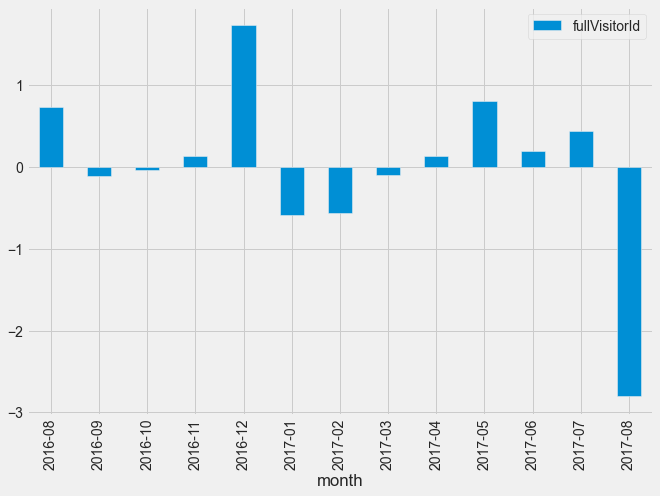

In [42]:
stats.zscore(dfMonth['fullVisitorId']).to_frame().plot.bar(figsize=(10, 7))

Как видим, для большей части месяцев, оценка не сильно отличается от нуля, однако есть аномальные месяцы, в которые посещаемость сайта была больше или меньше среднего числа посещаемости. Данный график согласуется с линейным графиком среднего кол-ва пользователей в месяц в начале тетрадки

<AxesSubplot:xlabel='month'>

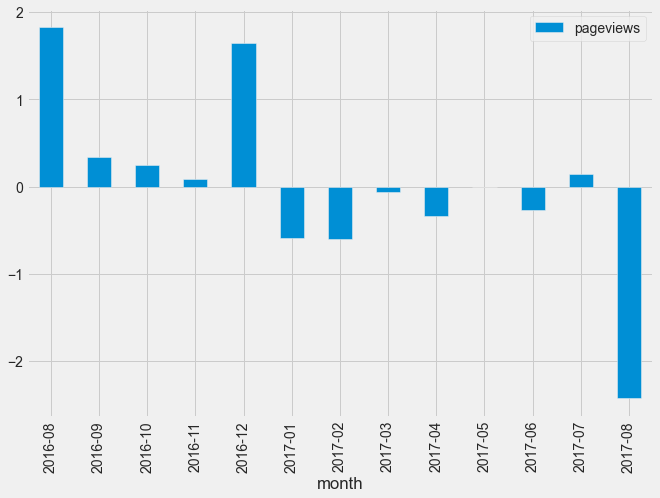

In [43]:
stats.zscore(dfBuy.groupby('month')['pageviews'].agg(sum)).to_frame().plot.bar(figsize=(10, 7))

Выше построили график оценки для просмотров страниц в разрезе месяца. Видим, что графики в целом согласованы между собой, и посещаемость сайта коррелирует с просмотрами страниц. Однако есть отдельные случаи, когда в одном случае z-оценка отрицательная, а в другом положительная. Посмотрим теперь на корреляцию этих переменных

In [44]:
dfBuy.groupby('month').agg({'fullVisitorId': 'nunique', 'pageviews': 'sum'}).corr()

fullVisitorId  pageviews
fullVisitorId       1.000000   0.914901
pageviews           0.914901   1.000000

<AxesSubplot:>

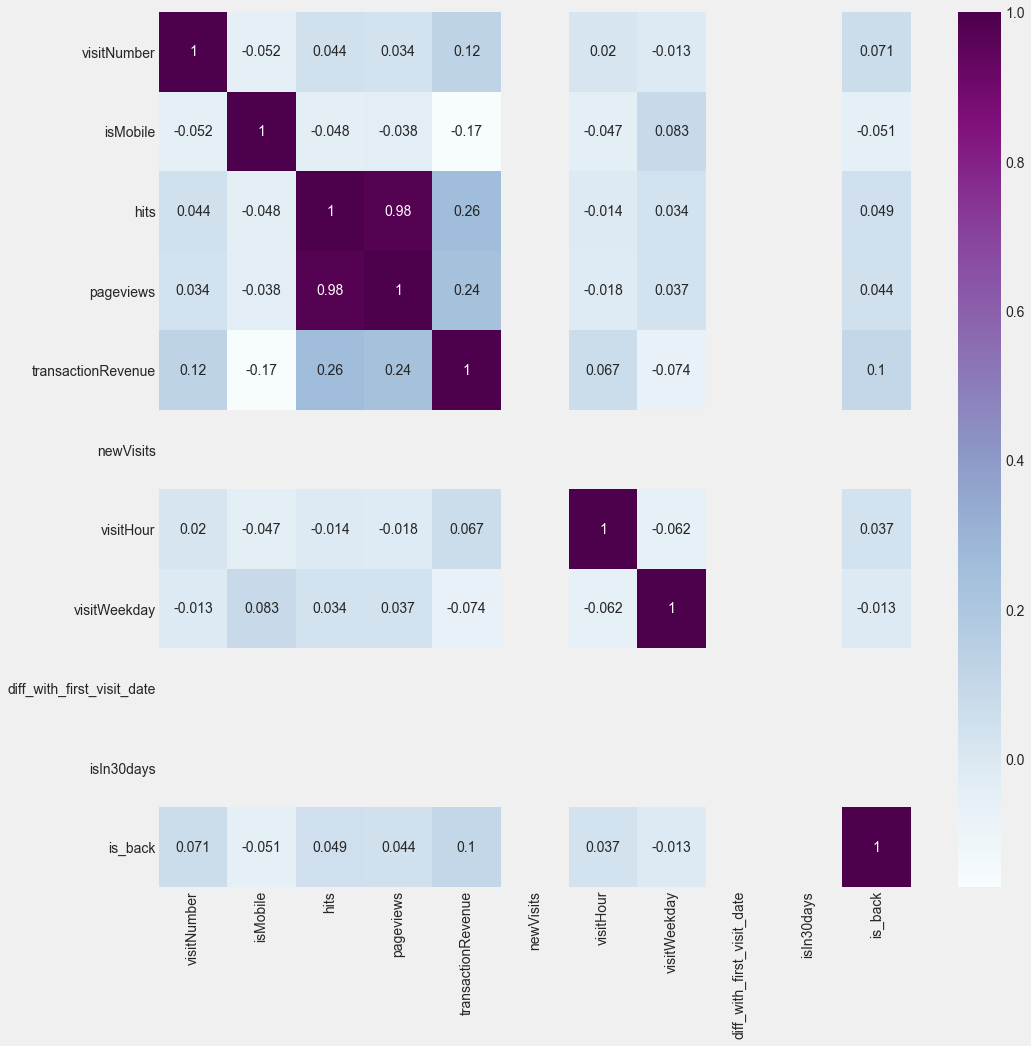

In [45]:
plt.figure(figsize=(15, 15))
sns.heatmap(dfBuy.corr(), annot=True, cmap='BuPu')

Видим, что заметных корреляций нигде нет, и также ничегоне коррелирует с целевой переменной. Только посещения страницы почти на 100 процентов взаимосвязаны с действиями на странице, что логично

Проверим несколько гипотез
H01: Прибыль с транзакций у пользователей, которые впоследствии вернулись на сайт, и тех, кто не вернулся, не отличается
H11: Связь между прибылью и тем, вернется ли пользователь, существует и статистически значима
H02: Прибыль с транзакций у пользователей, которые пришли по реферальной ссылке, пользователей, которые пришли на сайт "органичным поиском", пользователей, которые пришли на сайт по прямой ссылки, и другими, не отличается
H12: Связь между прибылью и способом входа существует и статистически значима
H03: Прибыль с транзакций у пользователей, которые заходили на сайт с макинтоша или iOS, и других пользователей не отличается
H13: Связь между макинтошем и прибылью существует и статистически значима

In [46]:
dfhypotheses = dfBuy.copy()
dfhypotheses['cat_transaction'] = pd.cut(x=dfhypotheses['transactionRevenue'],
                                         bins=[dfBuy['transactionRevenue'].quantile(0),
                                               dfBuy['transactionRevenue'].quantile(0.33),
                                               dfBuy['transactionRevenue'].quantile(0.67),
                                               dfBuy['transactionRevenue'].quantile(1)],
                                         labels=['Small', 'Average', 'High'])
dfhypotheses['cat_transaction'].head(10)

0     Average
1        High
4        High
5       Small
6        High
7       Small
8        High
9       Small
10    Average
11    Average
Name: cat_transaction, dtype: category
Categories (3, object): ['Small' < 'Average' < 'High']

In [47]:
dfBuy['channelGrouping'].value_counts()

Referral          4787
Organic Search    3209
Direct            1779
Paid Search        436
Display            117
Social             101
Affiliates           9
(Other)              1
Name: channelGrouping, dtype: int64

Оставим реферал, органический поиск и прямую ссылку как есть, а остальные значения, ввиду их маленького количества, сольем в категорию another

In [48]:
dfhypotheses['channelGroupingAnother'] = (
    dfhypotheses['channelGrouping'].apply(
        lambda w: 'another' if w not in ['Referral', 'Organic Search', 'Direct'] else w)
)
dfhypotheses['channelGroupingAnother']

0                Direct
1        Organic Search
4              Referral
5              Referral
6              Referral
              ...      
11510    Organic Search
11511          Referral
11512          Referral
11513          Referral
11514            Direct
Name: channelGroupingAnother, Length: 10439, dtype: object

In [49]:
dfhypotheses1 = dfhypotheses.groupby('is_back')['cat_transaction'].value_counts().unstack().transpose()
dfhypotheses1.head()

is_back             0    1
cat_transaction           
Small            3348   98
Average          3406  141
High             3204  241

In [50]:
chi2, prob, df, expected = stats.chi2_contingency(dfhypotheses1, correction=False)
prob

1.8549831023848556e-16

p-value маленький, следовательно отклоняем нулевую гипотезу. Связь между прибылью и возвратом пользователя существует и статистически значима

In [51]:
dfhypotheses2 = dfhypotheses.groupby('channelGroupingAnother')['cat_transaction'].value_counts().unstack().transpose()
dfhypotheses2.head(20)

channelGroupingAnother  Direct  Organic Search  Referral  another
cat_transaction                                                  
Small                      512            1404      1282      248
Average                    589             958      1769      231
High                       677             847      1736      185

In [52]:
chi2, prob, df, expected = stats.chi2_contingency(dfhypotheses2, correction=False)
prob

3.194993663782219e-59

p-value маленький, следовательно отклоняем нулевую гипотезу. Связь между прибылью и способов входа существует и статистически значима. Подтверждение тестирования гипотез можно и увидеть по графикам ниже

<AxesSubplot:xlabel='channelGroupingAnother'>

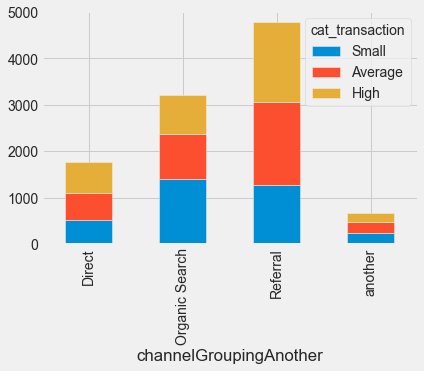

In [53]:
dfhypotheses.groupby('channelGroupingAnother')['cat_transaction'].value_counts().unstack().plot(kind='bar',
                                                                                                stacked=True)

<AxesSubplot:xlabel='is_back'>

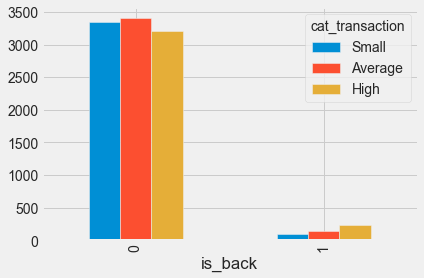

In [54]:
dfhypotheses.groupby('is_back')['cat_transaction'].value_counts().unstack().plot(kind='bar')

In [55]:
stats.ttest_ind(
    dfhypotheses[(dfhypotheses['operatingSystem'] == 'Macintosh') | (dfhypotheses['operatingSystem'] == 'iOS')][
        'transactionRevenue'],
    dfhypotheses[(dfhypotheses['operatingSystem'] != 'Macintosh') & (dfhypotheses['operatingSystem'] != 'iOS')][
        'transactionRevenue'],
    equal_var=False)

Ttest_indResult(statistic=7.94695791808936, pvalue=2.1548224077745935e-15)

p-value маленький, следовательно отклоняем нулевую гипотезу. Связь между прибылью и операционной системой существует и статистически значима. Это видно и по таблице ниже

In [56]:
dfhypotheses['operatingSystemApple'] = (
    dfhypotheses['operatingSystem'].apply(
        lambda w: 'another' if w not in ['Macintosh', 'iOS'] else 'Apple')
)
dfhypotheses3 = dfhypotheses.groupby('operatingSystemApple')['cat_transaction'].value_counts().unstack().transpose()
dfhypotheses3.head()

operatingSystemApple  Apple  another
cat_transaction                     
Small                  1923     1523
Average                2180     1367
High                   2270     1175

In [57]:
dfModel = dfhypotheses[
    ['channelGroupingAnother', 'month', 'visitNumber', 'browser', 'operatingSystem', 'deviceCategory', 'country',
     'hits', 'transactionRevenue', 'is_back', 'isIn30days']]
dfModel.head()

channelGroupingAnother    month  visitNumber browser operatingSystem  \
0                 Direct  2016-09            1  Chrome           Linux   
1         Organic Search  2016-09            3  Chrome       Macintosh   
4               Referral  2016-08            4  Chrome           Linux   
5               Referral  2016-09            6  Chrome         Windows   
6               Referral  2016-09            4  Chrome       Macintosh   

  deviceCategory        country  hits  transactionRevenue  is_back  isIn30days  
0        desktop  United States    11           17.449406        0           0  
1        desktop  United States    11           19.541283        0           0  
4        desktop  United States   157           19.125509        1           0  
5        desktop  United States    13           17.083177        0           0  
6        desktop  United States    17           20.168401        0           0

Большая часть колонок - категориальные. Сделаем для них категорию другое, как это делали с channel grouping

In [58]:
dfModel['browser'] = dfModel['browser'].apply(
    lambda w: 'another' if w not in list(
        dfModel['browser'].value_counts().sort_values(ascending=False)[:4].index) else w)
dfModel['operatingSystem'] = dfModel['operatingSystem'].apply(
    lambda w: 'another' if w not in list(
        dfModel['operatingSystem'].value_counts().sort_values(ascending=False)[:4].index) else w)
dfModel['country'] = dfModel['country'].apply(
    lambda w: 'another' if w not in list(
        dfModel['country'].value_counts().sort_values(ascending=False)[:12].index) else w)
dfModel['deviceCategory'] = dfModel['deviceCategory'].apply(
    lambda w: 'another' if w not in list(
        dfModel['deviceCategory'].value_counts().sort_values(ascending=False)[:3].index) else w)
dfModel.head(10)

<ipython-input-58-2162766bd714>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-2162766bd714>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-2162766bd714>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-2162766

channelGroupingAnother    month  visitNumber browser operatingSystem  \
0                  Direct  2016-09            1  Chrome           Linux   
1          Organic Search  2016-09            3  Chrome       Macintosh   
4                Referral  2016-08            4  Chrome           Linux   
5                Referral  2016-09            6  Chrome         Windows   
6                Referral  2016-09            4  Chrome       Macintosh   
7                Referral  2016-09            2  Chrome           Linux   
8                  Direct  2016-09            1  Safari       Macintosh   
9                Referral  2016-09           13  Chrome           Linux   
10         Organic Search  2016-09            1  Chrome         another   
11               Referral  2016-09            7  Chrome       Chrome OS   

   deviceCategory        country  hits  transactionRevenue  is_back  \
0         desktop  United States    11           17.449406        0   
1         desktop  United States    11           19.541283        0   
4         desktop  United States   157           19.125509        1   
5         desktop  United States    13           17.083177        0   
6         desktop  United States    17           20.168401        0   
7         desktop  United States    17           15.941359        0   
8         desktop  United States    19           19.796243        0   
9         desktop  United States    20           16.996892        0   
10         mobile  United States    22           17.384480        0   
11        desktop  United States    22           17.373142        0   

    isIn30days  
0            0  
1            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0  
10           0  
11           0

In [59]:
dfModelDummy = pd.get_dummies(dfModel, drop_first=True)
dfModelDummy.shape

(10439, 42)

In [60]:
dfModelDummy.head()

visitNumber  hits  transactionRevenue  is_back  isIn30days  \
0            1    11           17.449406        0           0   
1            3    11           19.541283        0           0   
4            4   157           19.125509        1           0   
5            6    13           17.083177        0           0   
6            4    17           20.168401        0           0   

   channelGroupingAnother_Organic Search  channelGroupingAnother_Referral  \
0                                      0                                0   
1                                      1                                0   
4                                      0                                1   
5                                      0                                1   
6                                      0                                1   

   channelGroupingAnother_another  month_2016-09  month_2016-10  ...  \
0                               0              1              0  ...   
1                               0              1              0  ...   
4                               0              0              0  ...   
5                               0              1              0  ...   
6                               0              1              0  ...   

   country_India  country_Japan  country_Mexico  country_Puerto Rico  \
0              0              0               0                    0   
1              0              0               0                    0   
4              0              0               0                    0   
5              0              0               0                    0   
6              0              0               0                    0   

   country_Singapore  country_Taiwan  country_United Kingdom  \
0                  0               0                       0   
1                  0               0                       0   
4                  0               0                       0   
5                  0               0                       0   
6                  0               0                       0   

   country_United States  country_Venezuela  country_another  
0                      1                  0                0  
1                      1                  0                0  
4                      1                  0                0  
5                      1                  0                0  
6                      1                  0                0  

[5 rows x 42 columns]

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, mean_squared_error, r2_score

In [62]:
x = dfModelDummy.drop(columns=['is_back'])
y = dfModelDummy['is_back']
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, stratify=y, random_state=42)

Сделаем поиск по решетке

In [63]:
params = {'max_iter': [50, 75, 100, 125]}
grid = GridSearchCV(LogisticRegression(), params)
grid.fit(x, y)
grid.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

LogisticRegression(max_iter=75)

In [64]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [65]:
y_pred = np.where(y_pred < 0.5, 0, 1)

In [66]:
mean_squared_error(y_test, y_pred)

0.04636015325670498

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2490
           1       0.00      0.00      0.00       120

    accuracy                           0.95      2610
   macro avg       0.48      0.50      0.49      2610
weighted avg       0.91      0.95      0.93      2610



Показатели очень хорошие для людей, которые не возвращались, теперь посмотрим как себя показывает логистическая регрессия

In [68]:
logicr = LogisticRegression(max_iter=75, penalty='l2', solver='liblinear')
logicr.fit(x_train, y_train)
y_pred = logicr.predict(x_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2490
           1       0.00      0.00      0.00       120

    accuracy                           0.95      2610
   macro avg       0.48      0.50      0.49      2610
weighted avg       0.91      0.95      0.93      2610



Показатели моделей почти идентичные. Скорей всего, это произошло из-за того, что датасет маленький, и is_back = 0 сильно перевешивает 1. Моделям на таких данных просто негде развернуться. Давайте попробуем удалить из датасета бОльшую часть людей, которые не вернулись, чтобы сбалансировать таргет

In [70]:
dfModelDummy[dfModelDummy['is_back'] == 1].shape[0] / dfModelDummy[dfModelDummy['is_back'] == 0].shape[0] * 100

4.819761020182749

In [71]:
dfNew = pd.concat([dfModelDummy[dfModelDummy['is_back'] == 1], dfModelDummy[dfModelDummy['is_back'] == 0].sample(frac=0.05)])
dfNew[dfNew['is_back'] == 1].shape[0] / dfNew[dfNew['is_back'] == 0].shape[0] * 100

96.3855421686747

In [72]:
dfNew.shape

(978, 42)

Очень мало записей для обучения моделей, но мы попробуем

In [73]:
x = dfNew.drop(columns=['is_back'])
y = dfNew['is_back']
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, stratify=y, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred = np.where(y_pred < 0.5, 0, 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       125
           1       0.60      0.66      0.63       120

    accuracy                           0.62       245
   macro avg       0.62      0.62      0.62       245
weighted avg       0.62      0.62      0.62       245



In [74]:
logicr = LogisticRegression(max_iter=75, penalty='l2', solver='liblinear')
logicr.fit(x_train, y_train)
y_pred = logicr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60       125
           1       0.60      0.69      0.64       120

    accuracy                           0.62       245
   macro avg       0.62      0.62      0.62       245
weighted avg       0.62      0.62      0.62       245



Теперь четко видно, что модели показывает не такие хорошие результаты, по метрикам они очень близки друг к другу